<a href="https://colab.research.google.com/github/polarbeariceskating/KonsepData-AI/blob/main/Bootcamp_Trees%26RandomForest_Kyphosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [4]:
# Decision Trees
# Training 1 decision trees
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [5]:
# Prediksi dan Eval
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.94      0.71      0.81        21
     present       0.33      0.75      0.46         4

    accuracy                           0.72        25
   macro avg       0.64      0.73      0.64        25
weighted avg       0.84      0.72      0.75        25

[[15  6]
 [ 1  3]]


In [9]:
# Visualisasi Tree
from IPython.display import Image
from sklearn.tree import export_graphviz
from io import StringIO
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

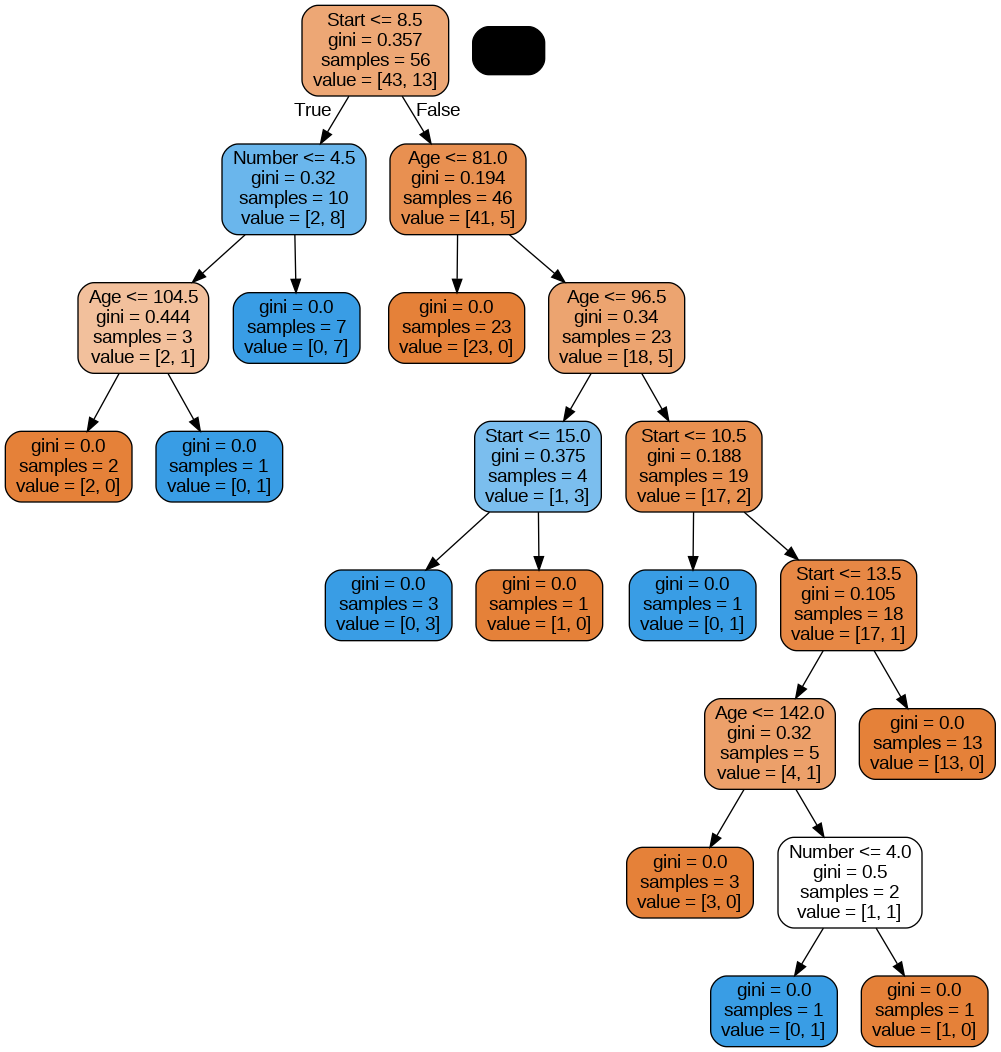

In [10]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [11]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[18  3]
 [ 1  3]]
              precision    recall  f1-score   support

      absent       0.95      0.86      0.90        21
     present       0.50      0.75      0.60         4

    accuracy                           0.84        25
   macro avg       0.72      0.80      0.75        25
weighted avg       0.88      0.84      0.85        25

